In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sensor:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4881159%2F8230806%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240426%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240426T000557Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c5ad052b1e85442fe39568b7a8e251ef7807740d1fa77351806b0564300f53f3fbcac3065b92032e2ff7cb18c1ab406b73de885bc8f8acde6e103797aa5f5fbe5c8c45ed077199404c3d8b4f44c63c0d83ec319847ed935ba588fc26907ac91045099e821dee76b9f31506a0111fdcf62d28c6dc1b47b3a68f52053c60cf1d0b4d0fd5ac5d941b6dec741389cbba9227d84bdc1023bf22547a03ce759e90347ea73cc9990d7cbda1f22e75d536b1a6ac1ca09f620943732cf18b880b9ae9f38474527c1f1184060a80edcb687ce375977c914f36404f06d6ab726c337db9fed941f593dadf0055b4a24a70cabd0998b98332731629098547c25dc613b8fecc8,dcdata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4881170%2F8230820%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240426%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240426T000557Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0f4f762b9aece45d033d28142a5abad21b8b46d4dbe1088e0edcc72021a1c8a3c6c9339f63702ae5a144fc40be7bcaf1551880c7e98f4d3684d404050bd539f343e2162199fa4d68b5a92e4291b713dea1cb45dee693abbd3a9608d8f6f61be84b6e3828bbd9cf1a6d7c3175f1edd1e274bc88f14aed3f39b4ebbc72f4012a6cf094bed45bf84a25173806a826ba5dc60bd665b5fc7a6da4531a317232114f893bff47972d0ed4b5ee537c63779082bb05315b9b96eacaddb13899768e563dac330279a78fb104397f24affa62ce4d262069059303e555598ee7a374a4ac38f93a2e0302c6051bdb1424462a3e9a8c6bf20da6649b36ae3026b0718385f8d3c5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df=pd.read_csv('/kaggle/input/dcdata/sensor_data_csv.csv')
df

,Num,Sensor,G1,G2,G3,G4,G5
0,1,S1_245,6.151,6.199,4.184,4.539,4.369
1,2,S2_245,5.280,5.042,13.327,4.934,2.014
2,3,S3_245,3.355,3.279,8.918,2.780,1.697
3,4,S4_245,4.012,4.227,3.751,3.297,3.539
4,5,S1_285,5.506,5.051,3.312,5.377,6.678
5,6,S2_285,5.137,5.246,13.328,5.178,3.293
6,7,S3_285,3.349,3.424,8.645,2.943,3.026
7,8,S4_285,3.761,3.505,1.339,3.203,4.906
8,9,S1_310,3.281,4.240,2.162,4.695,5.683
9,10,S2_310,3.868,4.467,5.959,4.261,2.429


In [ ]:
# Converting pandas dataframe to numpy array for computation
numpy_array = df.values
numpy_array = numpy_array[:, 1:]
print(numpy_array)
print(numpy_array.shape)
Sensors = df['Sensor'].values
print(Sensors)

[['S1_245' 6.151 6.199 4.184 4.539 4.369]
 ['S2_245' 5.28 5.042 13.327 4.934 2.014]
 ['S3_245' 3.355 3.279 8.918 2.78 1.697]
 ['S4_245' 4.012 4.227 3.751 3.297 3.539]
 ['S1_285' 5.506 5.051 3.312 5.377 6.678]
 ['S2_285' 5.137 5.246 13.328 5.178 3.293]
 ['S3_285' 3.349 3.424 8.645 2.943 3.026]
 ['S4_285' 3.761 3.505 1.339 3.203 4.906]
 ['S1_310' 3.281 4.24 2.162 4.695 5.683]
 ['S2_310' 3.868 4.467 5.959 4.261 2.429]
 ['S3_310' 2.343 2.942 4.412 2.659 2.086]
 ['S4_310' 2.379 3.123 0.656 3.382 4.215]
 ['S1_325' 5.602 4.847 0.967 5.645 3.837]
 ['S2_325' 6.575 6.261 8.528 7.57 4.847]
 ['S3_325' 4.504 4.313 6.255 5.108 4.545]
 ['S4_325' 4.315 3.532 0.344 4.158 3.236]
 ['S1_340' 8.0 7.98 0.657 7.088 9.669]
 ['S2_340' 9.593 9.301 6.875 10.997 11.023]
 ['S3_340' 6.978 7.248 6.101 7.328 10.353]
 ['S4_340' 6.013 5.773 0.372 4.859 8.554]]
(20, 6)
['S1_245' 'S2_245' 'S3_245' 'S4_245' 'S1_285' 'S2_285' 'S3_285' 'S4_285'
 'S1_310' 'S2_310' 'S3_310' 'S4_310' 'S1_325' 'S2_325' 'S3_325' 'S4_325'
 'S1_34

In [ ]:
import numpy as np

def calculate_U(data, Sensors):
    num_sensors, num_gases = data.shape

    U_values = {}

    for sensor_idx in range(num_sensors):
        sensor_values = data[sensor_idx, 1:]
        print(sensor_values)
        sensor_mean = np.mean(sensor_values)

        W = np.sum((sensor_values - sensor_mean) ** 2)
        overall_mean = np.mean(data[:,1:])

        B = num_gases * ((sensor_mean - overall_mean) ** 2)
        print(B)

        U = W / (W + B)

        U_values[Sensors[sensor_idx]] = U

    return U_values

U_values = calculate_U(numpy_array, Sensors)

Sorted_Sensors = sorted(U_values, key=U_values.get, reverse=True)
print(U_values)

print("Top 3 Sensors : ")
i = 0
for key in Sorted_Sensors:
  if(i >= 3):
    break
  print(key, ":", U_values[key])
  i += 1


[6.151 6.199 4.184 4.539 4.369]
0.045895509600001036
[5.28 5.042 13.327 4.934 2.014]
7.5057166296000215
[3.355 3.279 8.918 2.78 1.697]
5.941821717599991
[4.012 4.227 3.751 3.297 3.539]
9.162320085599985
[5.506 5.051 3.312 5.377 6.678]
0.20282699760000228
[5.137 5.246 13.328 5.178 3.293]
12.36327246960003
[3.349 3.424 8.645 2.943 3.026]
3.141060789599991
[3.761 3.505 1.339 3.203 4.906]
16.49656955759999
[3.281 4.24 2.162 4.695 5.683]
5.865640725599989
[3.868 4.467 5.959 4.261 2.429]
3.8798468375999944
[2.343 2.942 4.412 2.659 2.086]
26.77695150959998
[2.379 3.123 0.656 3.382 4.215]
30.373380021599967
[5.602 4.847 0.967 5.645 3.837]
4.047596373599993
[6.575 6.261 8.528 7.57 4.847]
18.485626005600015
[4.504 4.313 6.255 5.108 4.545]
0.018775701599999174
[4.315 3.532 0.344 4.158 3.236]
21.295379541599978
[8.0 7.98 0.657 7.088 9.669]
16.891285077600035
[9.593 9.301 6.875 10.997 11.023]
124.58983835760006
[6.978 7.248 6.101 7.328 10.353]
40.58059461360001
[6.013 5.773 0.372 4.859 8.554]
0.076

In [ ]:
df_transposed = df.set_index('Sensor').T
df_transposed

Sensor,S1_245,S2_245,S3_245,S4_245,S1_285,S2_285,S3_285,S4_285,S1_310,S2_310,S3_310,S4_310,S1_325,S2_325,S3_325,S4_325,S1_340,S2_340,S3_340,S4_340
Num,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000,20.000
G1,6.151,5.280,3.355,4.012,5.506,5.137,3.349,3.761,3.281,3.868,2.343,2.379,5.602,6.575,4.504,4.315,8.000,9.593,6.978,6.013
G2,6.199,5.042,3.279,4.227,5.051,5.246,3.424,3.505,4.240,4.467,2.942,3.123,4.847,6.261,4.313,3.532,7.980,9.301,7.248,5.773
G3,4.184,13.327,8.918,3.751,3.312,13.328,8.645,1.339,2.162,5.959,4.412,0.656,0.967,8.528,6.255,0.344,0.657,6.875,6.101,0.372
G4,4.539,4.934,2.780,3.297,5.377,5.178,2.943,3.203,4.695,4.261,2.659,3.382,5.645,7.570,5.108,4.158,7.088,10.997,7.328,4.859
G5,4.369,2.014,1.697,3.539,6.678,3.293,3.026,4.906,5.683,2.429,2.086,4.215,3.837,4.847,4.545,3.236,9.669,11.023,10.353,8.554


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = df[df['Sensor'].isin(['S4_340', 'S3_325',  'S1_245'])]
df1

,Num,Sensor,G1,G2,G3,G4,G5
0,1,S1_245,6.151,6.199,4.184,4.539,4.369
14,15,S3_325,4.504,4.313,6.255,5.108,4.545
19,20,S4_340,6.013,5.773,0.372,4.859,8.554


In [ ]:
df_melted = df1.melt(id_vars='Sensor', value_vars=['G1', 'G2', 'G3', 'G4', 'G5'], var_name='Gas', value_name='Reading')

# Step 2: Pivot the DataFrame to make 'Sensor' values into columns
df_pivoted = df_melted.pivot(index='Gas', columns='Sensor', values='Reading')
df_pivoted.reset_index(inplace=True)
df_pivoted

Sensor,Gas,S1_245,S2_245,S3_245
0,G1,6.151,5.280,3.355
1,G2,6.199,5.042,3.279
2,G3,4.184,13.327,8.918
3,G4,4.539,4.934,2.780
4,G5,4.369,2.014,1.697


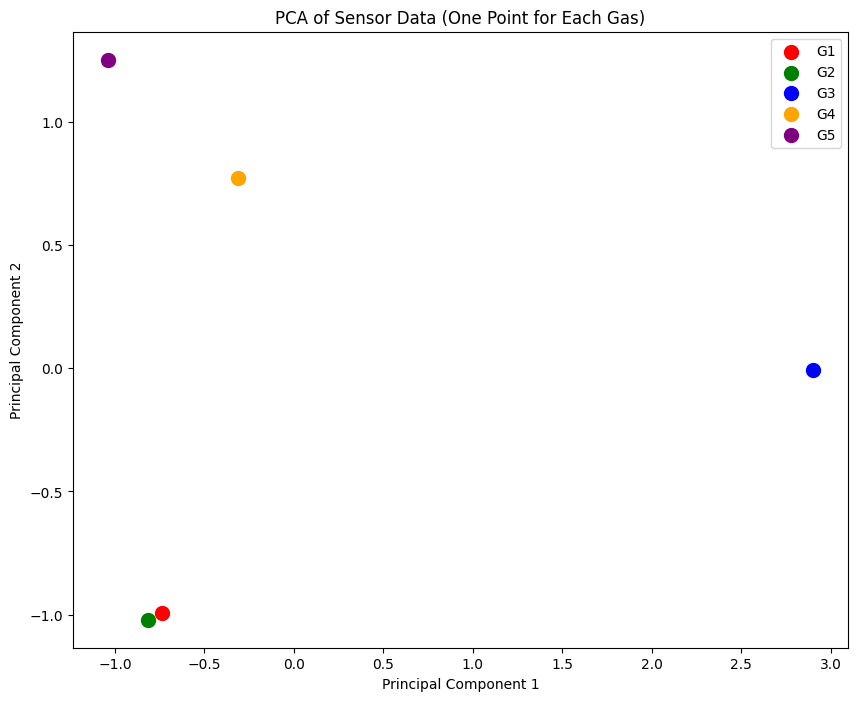

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_means = scaler.fit_transform(df_pivoted.drop(columns='Gas'))

# Apply PCA (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_means)

# Create a dataframe for the PCA results with gas labels
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Gas': df_pivoted['Gas']
})

# Plotting the PCA results with one point for each gas
colors = {'G1': 'red', 'G2': 'green', 'G3': 'blue', 'G4': 'orange', 'G5': 'purple'}

plt.figure(figsize=(10, 8))
for gas, color in colors.items():
    gas_point = pca_df[pca_df['Gas'] == gas]
    plt.scatter(gas_point['PC1'], gas_point['PC2'], c=color, label=gas, s=100)  # s=100 for larger points

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sensor Data (One Point for Each Gas)')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_pivoted is already defined with 'Gas' and sensor data
# Standardize data and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pivoted.drop(columns='Gas'))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Calculate pairwise Euclidean distances
euclidean_distances = distance.pdist(pca_result, metric='euclidean')  # Pairwise distances

# Convert to a square matrix
distance_matrix = distance.squareform(euclidean_distances)

# Create a DataFrame for distances with 'Gas' as row and column labels
df_distances = pd.DataFrame(
    distance_matrix,
    index=pca_df['Gas'],
    columns=pca_df['Gas']
)

# List to store formatted distances
formatted_distances = []

# Iterate through the upper triangular part of the distance matrix
for i in range(len(df_distances)):
    for j in range(i + 1, len(df_distances)):  # Ensures each pair is only listed once
        # Create a gas pair string
        gas_pair = f"{df_distances.index[i]}-{df_distances.columns[j]}"
        # Get the distance
        distance_value = df_distances.iloc[i, j]
        # Add to the formatted list
        formatted_distances.append(f"{gas_pair}: {distance_value:.2f}")  # Distance rounded to two decimal places

# Print formatted distances
print("Euclidean distances between gas pairs:")
for fd in formatted_distances:
    print(fd)


Euclidean distances between gas pairs:
G1-G2: 0.08
G1-G3: 3.77
G1-G4: 1.81
G1-G5: 2.26
G2-G3: 3.85
G2-G4: 1.86
G2-G5: 2.28
G3-G4: 3.30
G3-G5: 4.13
G4-G5: 0.87
